In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets,metrics,svm
from sklearn.model_selection import train_test_split

In [7]:
digits = datasets.load_digits()

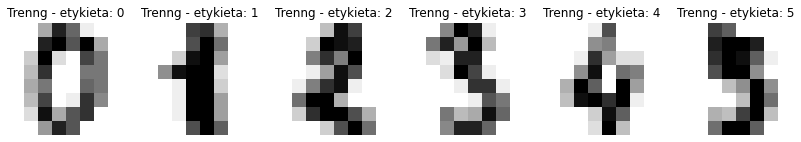

In [8]:
_, axes = plt.subplots(nrows=1,ncols=6,figsize=(14,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Trenng - etykieta: {label}")

In [9]:
n_samples = len(digits.images)
n_samples

1797

In [10]:
data = digits.images.reshape((n_samples,-1))

In [11]:
#tworzenie  modelu klasyfikatora
clf = svm.SVC(gamma=0.001)
X_train,X_test,y_train,y_test = train_test_split(
    data,digits.target,test_size=0.5,shuffle=True
)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

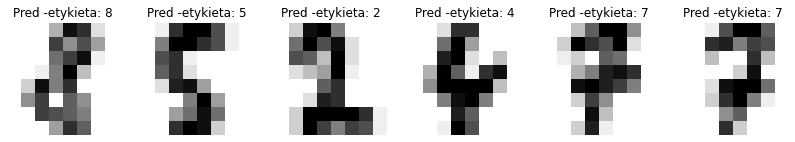

In [14]:
_, axes = plt.subplots(nrows=1,ncols=6,figsize=(14,3))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred -etykieta: {prediction}")

In [15]:
#ocena modelu
print(f'Raport klasyfikacyjny dla klasyfikatora clf: {clf}\n{metrics.classification_report(y_test,predicted)}\n')

Raport klasyfikacyjny dla klasyfikatora clf: SVC(gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.98      1.00      0.99       106
           2       1.00      1.00      1.00        81
           3       1.00      1.00      1.00        86
           4       0.99      1.00      0.99        79
           5       0.98      0.99      0.98        89
           6       1.00      1.00      1.00       101
           7       1.00      1.00      1.00        91
           8       1.00      0.97      0.98        86
           9       0.98      0.98      0.98        91

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899




Text(0.5, 0.98, 'Macierz pomyłek')

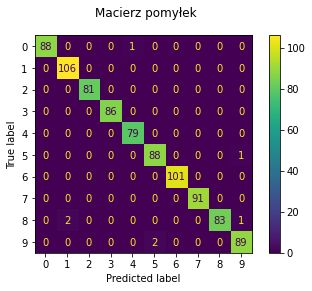

In [16]:
#macierz pomyłek
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek")